In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys


from collections import namedtuple

%matplotlib inline

from evaluation_RBF import *
from policy_search_RBF import *


#import environment
sys.path.append(r'../virl')
import virl

import time
from datetime import date

In [3]:
def env_test(env, path):
    observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(observation_examples)
    
    feature_transformer = sklearn.pipeline.FeatureUnion([
        ("rbf1", RBFSampler(gamma=5.0, n_components=100)),
        ("rbf2", RBFSampler(gamma=2.0, n_components=100)),
        ("rbf3", RBFSampler(gamma=1.0, n_components=100)),
        ("rbf4", RBFSampler(gamma=0.5, n_components=100))
        ])
    feature_transformer.fit(scaler.transform(observation_examples))
    
    approximator = FunctionApproximator(env, scaler,feature_transformer, eta0= 0.00, learning_rate= "constant", read_approximator = path)
    
    # Training part
    stats = reinforce(env, approximator, 200, use_training=False, epsilon = 0)
    
    return stats

In [4]:
count = 10

In [4]:
for index in range(count):
    
    path = ["./data/data{}/model0".format(index), 
            "./data/data{}/model1".format(index),
            "./data/data{}/model2".format(index),
            "./data/data{}/model3".format(index)]
    
    env = virl.Epidemic(problem_id = index, noisy = False, stochastic = False)
    
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data/data{}/stats_test_FF'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = index, noisy = True, stochastic = False)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data/data{}/stats_test_TF'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = index, noisy = False, stochastic = True)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data/data{}/stats_test_FT'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()
    
    
    env = virl.Epidemic(problem_id = index, noisy = True, stochastic = True)
    stats_test = env_test(env, path)
    # save
    save_stats = Save_stats(stats_test)
    file = open('./data/data{}/stats_test_TT'.format(index), 'wb')
    pickle.dump(save_stats, file)
    file.close()


Step 51 @ Episode 200/200 (-1.9138398488276251))

### Plot the stats_test

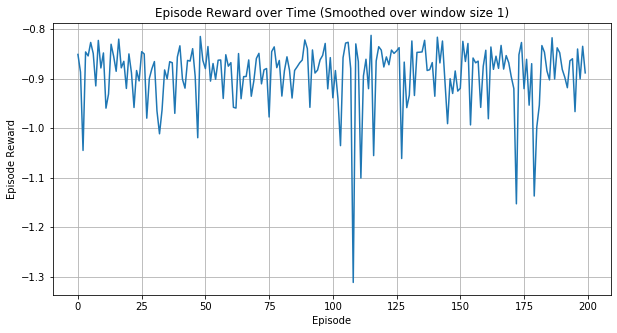

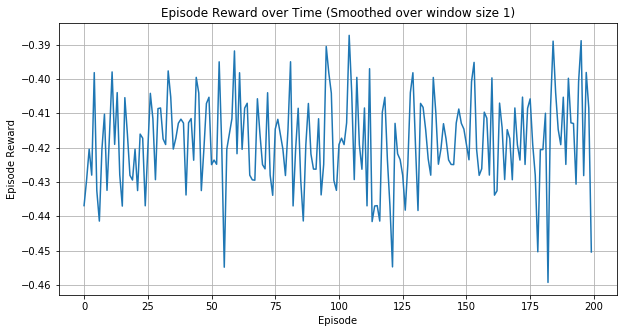

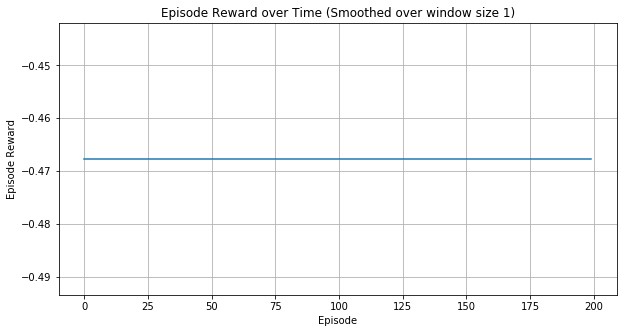

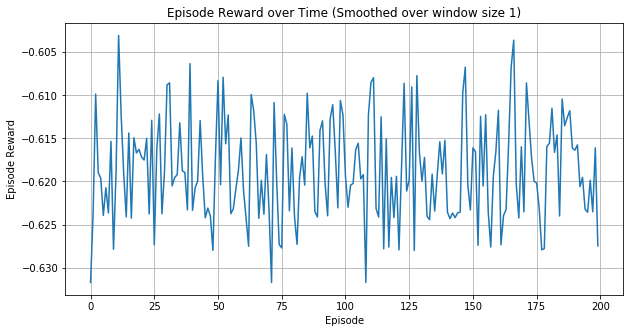

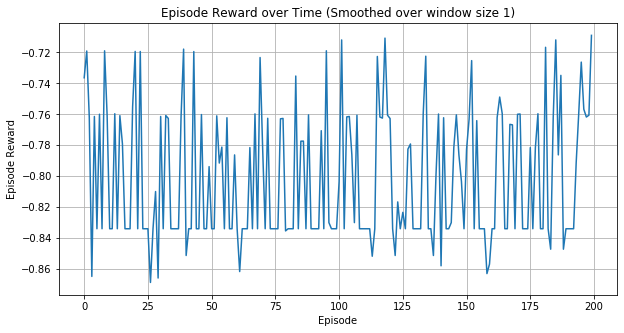

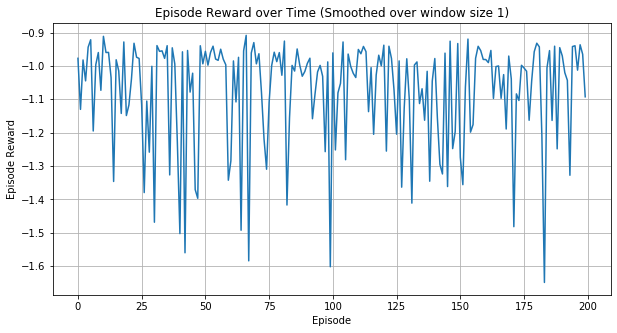

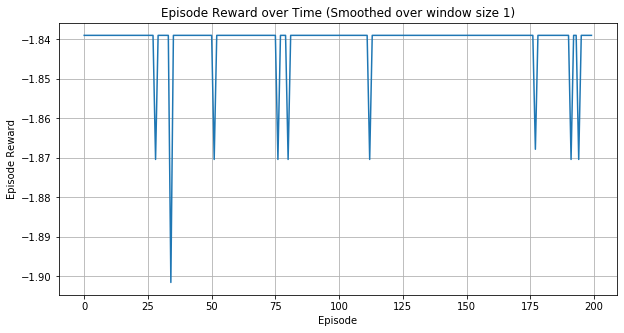

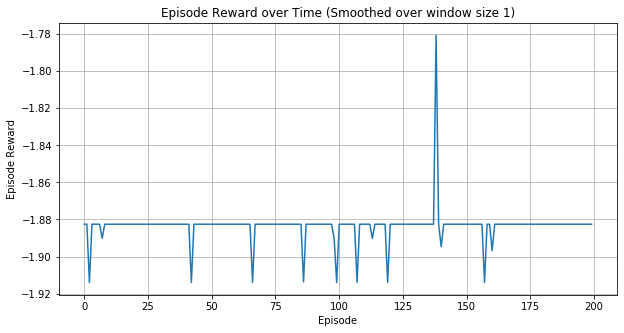

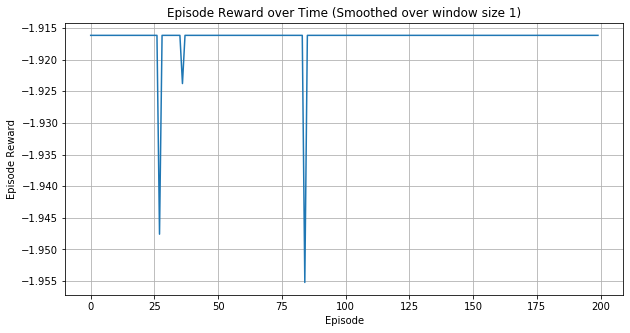

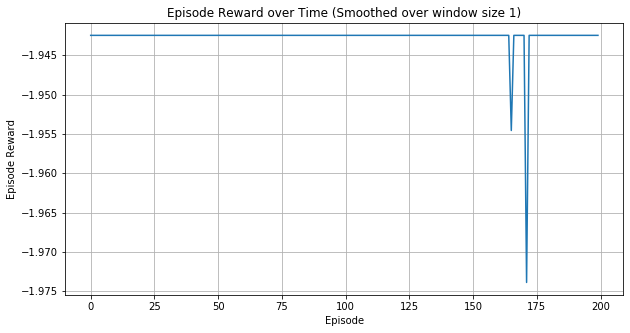

In [6]:
for i in range(count):
    file_stats = open('./data/data{}/stats_test_TF'.format(i), 'rb')
    stats_test = pickle.load(file_stats)
    plot_stats = Plot_stats(stats_test)
    plot_stats.plot_stats_test(smoothing_window = 1)
    plt.savefig('./picture/test_TF/TF_id{}.svg'.format(i))


#### All problems analysis (Noisy = True, stochastic = False)

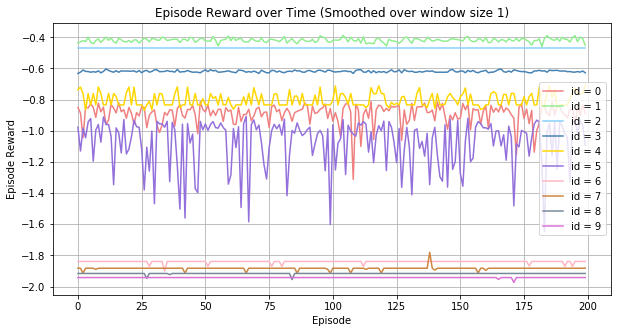

In [7]:
for i in range(count):
    file_stats = open('./data/data{}/stats_test_TF'.format(i), 'rb')
    stats_test = pickle.load(file_stats)
    smoothing_window = 1
    rewards_test = pd.Series(stats_test.stats_test_reward).rolling(smoothing_window, min_periods=smoothing_window).mean()
        
    if(i == 0):
        rewards_test0 = rewards_test
    if(i == 1):
        rewards_test1 = rewards_test
    if(i == 2):
        rewards_test2 = rewards_test
    if(i == 3):
        rewards_test3 = rewards_test
    if(i == 4):
        rewards_test4 = rewards_test
    if(i == 5):
        rewards_test5 = rewards_test
    if(i == 6):
        rewards_test6 = rewards_test
    if(i == 7):
        rewards_test7 = rewards_test
    if(i == 8):
        rewards_test8 = rewards_test
    if(i == 9):
        rewards_test9 = rewards_test
    
    
fig1 = plt.figure(figsize=(10,5))
plt.plot(rewards_test0, color = 'lightcoral', label = 'id = 0')
plt.plot(rewards_test1, color = 'lightgreen', label = 'id = 1')
plt.plot(rewards_test2, color = 'lightskyblue', label = 'id = 2')
plt.plot(rewards_test3, color = 'steelblue', label = 'id = 3')
plt.plot(rewards_test4, color = 'gold', label = 'id = 4')
plt.plot(rewards_test5, color = 'mediumpurple', label = 'id = 5')
plt.plot(rewards_test6, color = 'lightpink', label = 'id = 6')
plt.plot(rewards_test7, color = 'peru', label = 'id = 7')
plt.plot(rewards_test8, color = 'lightslategray', label = 'id = 8')
plt.plot(rewards_test9, color = 'orchid', label = 'id = 9')
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
plt.grid(True)
plt.savefig('./picture/test_all/TF.svg'.format(i))
plt.legend()
plt.show()


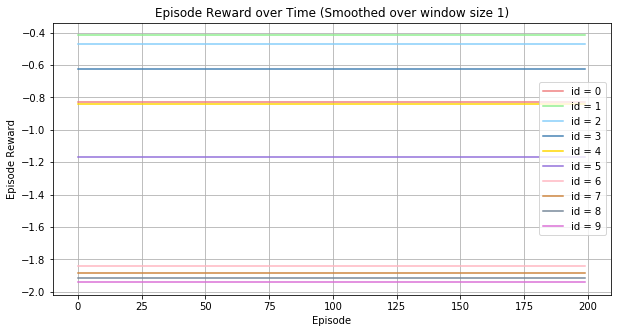

In [8]:
for i in range(count):
    file_stats = open('./data/data{}/stats_test_FF'.format(i), 'rb')
    stats_test = pickle.load(file_stats)
    smoothing_window = 1
    rewards_test = pd.Series(stats_test.stats_test_reward).rolling(smoothing_window, min_periods=smoothing_window).mean()
        
    if(i == 0):
        rewards_test0 = rewards_test
    if(i == 1):
        rewards_test1 = rewards_test
    if(i == 2):
        rewards_test2 = rewards_test
    if(i == 3):
        rewards_test3 = rewards_test
    if(i == 4):
        rewards_test4 = rewards_test
    if(i == 5):
        rewards_test5 = rewards_test
    if(i == 6):
        rewards_test6 = rewards_test
    if(i == 7):
        rewards_test7 = rewards_test
    if(i == 8):
        rewards_test8 = rewards_test
    if(i == 9):
        rewards_test9 = rewards_test
    
    
fig1 = plt.figure(figsize=(10,5))
plt.plot(rewards_test0, color = 'lightcoral', label = 'id = 0')
plt.plot(rewards_test1, color = 'lightgreen', label = 'id = 1')
plt.plot(rewards_test2, color = 'lightskyblue', label = 'id = 2')
plt.plot(rewards_test3, color = 'steelblue', label = 'id = 3')
plt.plot(rewards_test4, color = 'gold', label = 'id = 4')
plt.plot(rewards_test5, color = 'mediumpurple', label = 'id = 5')
plt.plot(rewards_test6, color = 'lightpink', label = 'id = 6')
plt.plot(rewards_test7, color = 'peru', label = 'id = 7')
plt.plot(rewards_test8, color = 'lightslategray', label = 'id = 8')
plt.plot(rewards_test9, color = 'orchid', label = 'id = 9')
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
plt.grid(True)
plt.savefig('./picture/test_all/FF.svg'.format(i))
plt.legend()
plt.show()


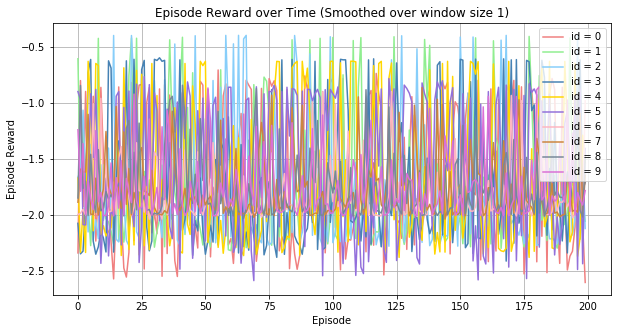

In [5]:
for i in range(count):
    file_stats = open('./data/data{}/stats_test_TT'.format(i), 'rb')
    stats_test = pickle.load(file_stats)
    smoothing_window = 1
        
    if(i == 0):
        rewards_test0 = stats_test.stats_test_reward
    if(i == 1):
        rewards_test1 = stats_test.stats_test_reward
    if(i == 2):
        rewards_test2 = stats_test.stats_test_reward
    if(i == 3):
        rewards_test3 = stats_test.stats_test_reward
    if(i == 4):
        rewards_test4 = stats_test.stats_test_reward
    if(i == 5):
        rewards_test5 = stats_test.stats_test_reward
    if(i == 6):
        rewards_test6 = stats_test.stats_test_reward
    if(i == 7):
        rewards_test7 = stats_test.stats_test_reward
    if(i == 8):
        rewards_test8 = stats_test.stats_test_reward
    if(i == 9):
        rewards_test9 = stats_test.stats_test_reward
    
    
fig1 = plt.figure(figsize=(10,5))
plt.plot(rewards_test0, color = 'lightcoral', label = 'id = 0')
plt.plot(rewards_test1, color = 'lightgreen', label = 'id = 1')
plt.plot(rewards_test2, color = 'lightskyblue', label = 'id = 2')
plt.plot(rewards_test3, color = 'steelblue', label = 'id = 3')
plt.plot(rewards_test4, color = 'gold', label = 'id = 4')
plt.plot(rewards_test5, color = 'mediumpurple', label = 'id = 5')
plt.plot(rewards_test6, color = 'lightpink', label = 'id = 6')
plt.plot(rewards_test7, color = 'peru', label = 'id = 7')
plt.plot(rewards_test8, color = 'lightslategray', label = 'id = 8')
plt.plot(rewards_test9, color = 'orchid', label = 'id = 9')
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
plt.grid(True)
plt.savefig('./picture/test_all/TT.svg'.format(i))
plt.legend()
plt.show()
